# Abortion around the world

# Data expolorer

In [1]:
import pandas as pd
import re
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("cleaned-survey.csv", 
                 sep = ";", header=[0])

In [3]:
df.head()

,Region,Sub-region,ISO Code,Country,Date Completed,1j. On request (Yes/No/Law Varies By Jurisdiction),1j. On request (Source Document Number / Notes),1j. On request (See Note),1j. On request (See Note Source Documents),1a. To save a woman’s life (Yes/No/Law Varies By Jurisdiction),...,1h. In cases of foetal impairment (See Note Source Documents),1i. For economic or social reasons (Yes/No/Law Varies By Jurisdiction),1i. For economic or social reasons (Source Document Number / Notes),1i. For economic or social reasons (See Note),1i. For economic or social reasons (See Note Source Documents),1k. Other (please specify),1k. Other (please specify) (Law Varies By Jurisdiction),1k. Other (please specify) (Law Varies By Jurisdiction) (Source Document Number / Notes),1k. Other (please specify) (Law Varies By Jurisdiction) (See Note),1k. Other (please specify) (Law Varies By Jurisdiction) (See Note Source Documents)
0,Africa,Northern Africa,DZ,Algeria,7 May 2017,No,https://abortion-policies.srhr.org/documents/c...,NaN,NaN,Yes,...,NaN,No,https://abortion-policies.srhr.org/documents/c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,Middle Africa,AO,Angola,22 April 2020,Yes,https://abortion-policies.srhr.org/documents/c...,NaN,NaN,Yes,...,NaN,No,https://abortion-policies.srhr.org/documents/c...,NaN,NaN,Sexual assault. Pregnancy which is the result ...,NaN,https://abortion-policies.srhr.org/documents/c...,Rape and incest are not specifically mentioned...,NaN
2,Africa,Western Africa,BJ,Benin,7 May 2017,No,https://abortion-policies.srhr.org/documents/c...,NaN,NaN,Yes,...,NaN,No,https://abortion-policies.srhr.org/documents/c...,NaN,NaN,"Abortion for the minor child, in case this wou...",NaN,https://abortion-policies.srhr.org/documents/c...,No gestational limit specified.,NaN
3,Africa,Southern Africa,BW,Botswana,9 April 2020,NaN,2 Not Specified,NaN,NaN,Yes,...,NaN,NaN,2 Not Specified,NaN,NaN,Defilement,NaN,https://abortion-policies.srhr.org/documents/c...,The gestational limit for abortion in case of ...,NaN
4,Africa,Western Africa,BF,Burkina Faso,19 November 2018,No,https://abortion-policies.srhr.org/documents/c...,NaN,NaN,Yes,...,NaN,No,https://abortion-policies.srhr.org/documents/c...,NaN,NaN,,NaN,NaN,NaN,NaN


In [4]:
r = re.compile(pattern='^1\D\..*Yes\/No\/Law')
selected_cols = list(filter( r.match, list(df.columns)))
selected_cols.extend(['Region', 'Sub-region', 'ISO Code', 'Country'])
print(selected_cols)

['1j. On request (Yes/No/Law Varies By Jurisdiction)', '1a. To save a woman’s life (Yes/No/Law Varies By Jurisdiction)', '1b. To preserve a woman’s health (Yes/No/Law Varies By Jurisdiction)', '1c. To preserve a woman’s physical health (Yes/No/Law Varies By Jurisdiction)', '1d. To preserve a woman’s mental health (Yes/No/Law Varies By Jurisdiction)', '1e. In cases of intellectual or cognitive disability of the woman (Yes/No/Law Varies By Jurisdiction)', '1f. In cases of incest (Yes/No/Law Varies By Jurisdiction)', '1g. In cases of rape (Yes/No/Law Varies By Jurisdiction)', '1h. In cases of foetal impairment (Yes/No/Law Varies By Jurisdiction)', '1i. For economic or social reasons (Yes/No/Law Varies By Jurisdiction)', 'Region', 'Sub-region', 'ISO Code', 'Country']


In [5]:
## Only take columns related to abortion measure

df_yn = df[selected_cols]

In [6]:
df_yn

,1j. On request (Yes/No/Law Varies By Jurisdiction),1a. To save a woman’s life (Yes/No/Law Varies By Jurisdiction),1b. To preserve a woman’s health (Yes/No/Law Varies By Jurisdiction),1c. To preserve a woman’s physical health (Yes/No/Law Varies By Jurisdiction),1d. To preserve a woman’s mental health (Yes/No/Law Varies By Jurisdiction),1e. In cases of intellectual or cognitive disability of the woman (Yes/No/Law Varies By Jurisdiction),1f. In cases of incest (Yes/No/Law Varies By Jurisdiction),1g. In cases of rape (Yes/No/Law Varies By Jurisdiction),1h. In cases of foetal impairment (Yes/No/Law Varies By Jurisdiction),1i. For economic or social reasons (Yes/No/Law Varies By Jurisdiction),Region,Sub-region,ISO Code,Country
0,No,Yes,No,Yes,Yes,No,No,No,No,No,Africa,Northern Africa,DZ,Algeria
1,Yes,Yes,No,Yes,Yes,No,No,No,Yes,No,Africa,Middle Africa,AO,Angola
2,No,Yes,Yes,No,NaN,No,Yes,Yes,Yes,No,Africa,Western Africa,BJ,Benin
3,NaN,Yes,NaN,Yes,Yes,NaN,Yes,Yes,Yes,NaN,Africa,Southern Africa,BW,Botswana
4,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Africa,Western Africa,BF,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,No,Yes,No,Yes,Yes,No,No,No,No,No,Oceania,Polynesia,WS,Samoa
259,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania,Melanesia,SB,Solomon Islands
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania,Polynesia,TO,Tonga
261,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania,Polynesia,TV,Tuvalu


In [7]:
df_yn.shape

(263, 14)

In [8]:
df.shape

(263, 50)

In [9]:
df_yn.describe()

,1j. On request (Yes/No/Law Varies By Jurisdiction),1a. To save a woman’s life (Yes/No/Law Varies By Jurisdiction),1b. To preserve a woman’s health (Yes/No/Law Varies By Jurisdiction),1c. To preserve a woman’s physical health (Yes/No/Law Varies By Jurisdiction),1d. To preserve a woman’s mental health (Yes/No/Law Varies By Jurisdiction),1e. In cases of intellectual or cognitive disability of the woman (Yes/No/Law Varies By Jurisdiction),1f. In cases of incest (Yes/No/Law Varies By Jurisdiction),1g. In cases of rape (Yes/No/Law Varies By Jurisdiction),1h. In cases of foetal impairment (Yes/No/Law Varies By Jurisdiction),1i. For economic or social reasons (Yes/No/Law Varies By Jurisdiction),Region,Sub-region,ISO Code,Country
count,217,217,188,190,188,178,183,192,201,176,263,253,261,263
unique,3,3,3,3,3,3,3,3,3,3,6,19,192,263
top,No,Yes,No,No,No,No,No,Yes,Yes,No,Europe,Western Europe,CH,Algeria
freq,134,155,107,121,121,157,123,95,99,151,75,34,26,1


In [10]:
df_yn.isnull().sum()/df_yn.shape[0]

1j. On request (Yes/No/Law Varies By Jurisdiction)                                                       0.174905
1a. To save a woman’s life (Yes/No/Law Varies By Jurisdiction)                                           0.174905
1b. To preserve a woman’s health (Yes/No/Law Varies By Jurisdiction)                                     0.285171
1c. To preserve a woman’s physical health (Yes/No/Law Varies By Jurisdiction)                            0.277567
1d. To preserve a woman’s mental health (Yes/No/Law Varies By Jurisdiction)                              0.285171
1e. In cases of intellectual or cognitive disability of the woman (Yes/No/Law Varies By Jurisdiction)    0.323194
1f. In cases of incest (Yes/No/Law Varies By Jurisdiction)                                               0.304183
1g. In cases of rape (Yes/No/Law Varies By Jurisdiction)                                                 0.269962
1h. In cases of foetal impairment (Yes/No/Law Varies By Jurisdiction)                   

We cannot fill in the missing values here as it is specific for each country. We'll add an additional category of 'N/A'

In [11]:
df_yn = df_yn.fillna(value = 'N/A')

### 1: How the countries differ in the abortion policy

Put all the non-specify to one category only 

In [12]:
count_df = df_yn.iloc[:,:10].apply(lambda x: x.value_counts(), axis=0)
# count_df['col'] = df_yn.columns[1:10]

In [13]:
df_yn.columns[:10]

Index(['1j. On request (Yes/No/Law Varies By Jurisdiction)',
       '1a. To save a woman’s life (Yes/No/Law Varies By Jurisdiction)',
       '1b. To preserve a woman’s health (Yes/No/Law Varies By Jurisdiction)',
       '1c. To preserve a woman’s physical health (Yes/No/Law Varies By Jurisdiction)',
       '1d. To preserve a woman’s mental health (Yes/No/Law Varies By Jurisdiction)',
       '1e. In cases of intellectual or cognitive disability of the woman (Yes/No/Law Varies By Jurisdiction)',
       '1f. In cases of incest (Yes/No/Law Varies By Jurisdiction)',
       '1g. In cases of rape (Yes/No/Law Varies By Jurisdiction)',
       '1h. In cases of foetal impairment (Yes/No/Law Varies By Jurisdiction)',
       '1i. For economic or social reasons (Yes/No/Law Varies By Jurisdiction)'],
      dtype='object')

In [14]:
print('\n,'.join(map(str,count_df.columns)))

1j. On request (Yes/No/Law Varies By Jurisdiction)
,1a. To save a woman’s life (Yes/No/Law Varies By Jurisdiction)
,1b. To preserve a woman’s health (Yes/No/Law Varies By Jurisdiction)
,1c. To preserve a woman’s physical health (Yes/No/Law Varies By Jurisdiction)
,1d. To preserve a woman’s mental health (Yes/No/Law Varies By Jurisdiction)
,1e. In cases of intellectual or cognitive disability of the woman (Yes/No/Law Varies By Jurisdiction)
,1f. In cases of incest (Yes/No/Law Varies By Jurisdiction)
,1g. In cases of rape (Yes/No/Law Varies By Jurisdiction)
,1h. In cases of foetal impairment (Yes/No/Law Varies By Jurisdiction)
,1i. For economic or social reasons (Yes/No/Law Varies By Jurisdiction)


In [15]:
count_df = count_df.transpose()

In [16]:
count_df

,Law Varies By Jurisdiction,N/A,No,Yes
1j. On request (Yes/No/Law Varies By Jurisdiction),4,46,134,79
1a. To save a woman’s life (Yes/No/Law Varies By Jurisdiction),4,46,58,155
1b. To preserve a woman’s health (Yes/No/Law Varies By Jurisdiction),4,75,107,77
1c. To preserve a woman’s physical health (Yes/No/Law Varies By Jurisdiction),5,73,121,64
1d. To preserve a woman’s mental health (Yes/No/Law Varies By Jurisdiction),5,75,121,62
1e. In cases of intellectual or cognitive disability of the woman (Yes/No/Law Varies By Jurisdiction),5,85,157,16
1f. In cases of incest (Yes/No/Law Varies By Jurisdiction),5,80,123,55
1g. In cases of rape (Yes/No/Law Varies By Jurisdiction),4,71,93,95
1h. In cases of foetal impairment (Yes/No/Law Varies By Jurisdiction),5,62,97,99
1i. For economic or social reasons (Yes/No/Law Varies By Jurisdiction),5,87,151,20


In [17]:
count_df.index = [re.sub(r'\(Yes\/No\/Law Varies By Jurisdiction\)', '', i) for i in count_df.index]

In [18]:
count_df

,Law Varies By Jurisdiction,N/A,No,Yes
1j. On request,4,46,134,79
1a. To save a woman’s life,4,46,58,155
1b. To preserve a woman’s health,4,75,107,77
1c. To preserve a woman’s physical health,5,73,121,64
1d. To preserve a woman’s mental health,5,75,121,62
1e. In cases of intellectual or cognitive disability of the woman,5,85,157,16
1f. In cases of incest,5,80,123,55
1g. In cases of rape,4,71,93,95
1h. In cases of foetal impairment,5,62,97,99
1i. For economic or social reasons,5,87,151,20


<AxesSubplot:>

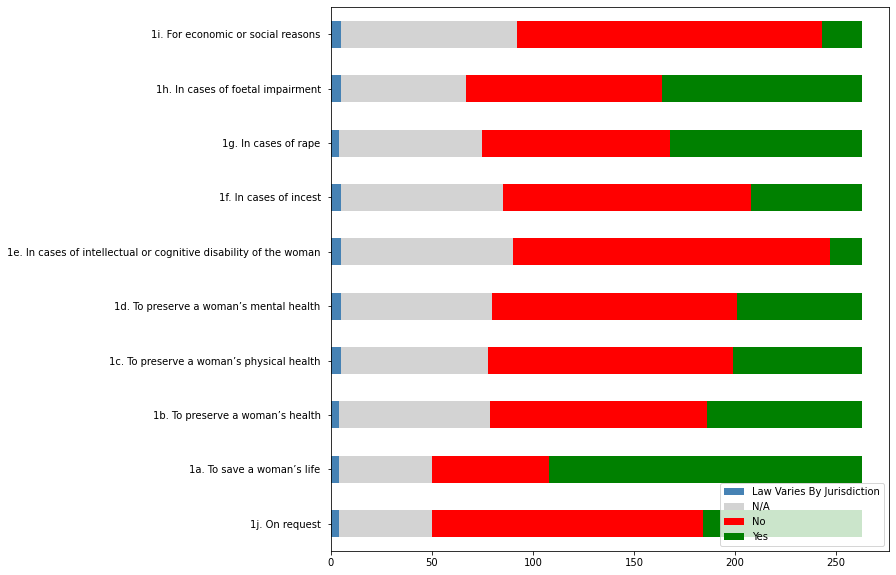

In [19]:
%matplotlib inline
col_map = {'Law Varies By Jurisdiction': "steelblue", 'N/A': "lightgrey", 'Yes':'Green', 'No': 'Red'}
count_df.plot.barh(stacked = True, figsize=(10,10), color = col_map)
#enlarge
#putting number lable
#rotate

#### Conclusion: 

- More than a half of the countries allow abortion to save women's life. This is the point/base argument that most countries agree on 
- In contrast, more than a half country does not allow Economic or social reasons to be used for abortion
- To my surprise, the women with intellectual/cognitive disability could not allowed for abortion in more than a half of the countries as well 

### 2: Does it differ in continents?

In [20]:
df_yn

,1j. On request (Yes/No/Law Varies By Jurisdiction),1a. To save a woman’s life (Yes/No/Law Varies By Jurisdiction),1b. To preserve a woman’s health (Yes/No/Law Varies By Jurisdiction),1c. To preserve a woman’s physical health (Yes/No/Law Varies By Jurisdiction),1d. To preserve a woman’s mental health (Yes/No/Law Varies By Jurisdiction),1e. In cases of intellectual or cognitive disability of the woman (Yes/No/Law Varies By Jurisdiction),1f. In cases of incest (Yes/No/Law Varies By Jurisdiction),1g. In cases of rape (Yes/No/Law Varies By Jurisdiction),1h. In cases of foetal impairment (Yes/No/Law Varies By Jurisdiction),1i. For economic or social reasons (Yes/No/Law Varies By Jurisdiction),Region,Sub-region,ISO Code,Country
0,No,Yes,No,Yes,Yes,No,No,No,No,No,Africa,Northern Africa,DZ,Algeria
1,Yes,Yes,No,Yes,Yes,No,No,No,Yes,No,Africa,Middle Africa,AO,Angola
2,No,Yes,Yes,No,N/A,No,Yes,Yes,Yes,No,Africa,Western Africa,BJ,Benin
3,N/A,Yes,N/A,Yes,Yes,N/A,Yes,Yes,Yes,N/A,Africa,Southern Africa,BW,Botswana
4,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Africa,Western Africa,BF,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,No,Yes,No,Yes,Yes,No,No,No,No,No,Oceania,Polynesia,WS,Samoa
259,N/A,Yes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Oceania,Melanesia,SB,Solomon Islands
260,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Oceania,Polynesia,TO,Tonga
261,N/A,Yes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Oceania,Polynesia,TV,Tuvalu


In [21]:
## Stacked bar chart for each continents

In [22]:
# Plot for 1j. On request (Yes/No/Law Varies By Jurisdiction)

In [23]:
count_1j = df_yn.groupby(['1j. On request (Yes/No/Law Varies By Jurisdiction)', 'Region']).size().unstack(fill_value=0)
count_1j = count_1j.transpose()
count_1j

1j. On request (Yes/No/Law Varies By Jurisdiction),Law Varies By Jurisdiction,N/A,No,Yes
Region,,,,
Africa,1,11,36,6
Asia,0,5,27,16
Europe,1,5,36,33
Latin America,1,12,32,4
North America,0,0,0,13
Oceania,1,13,3,7


<AxesSubplot:ylabel='Region'>

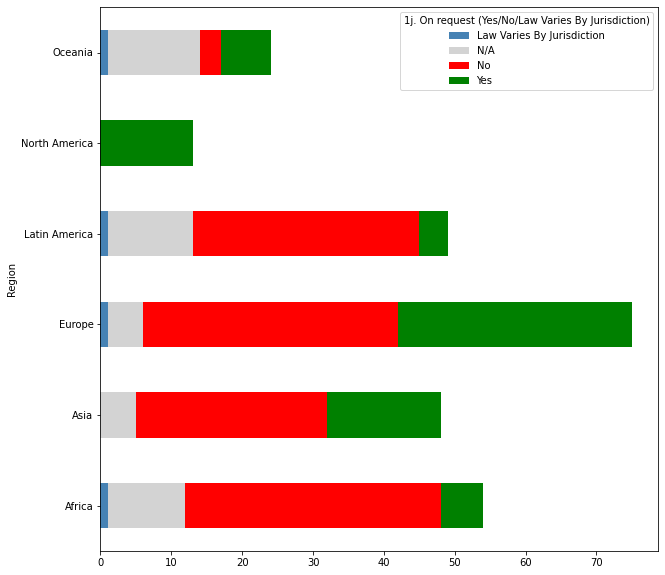

In [24]:
%matplotlib inline
# col_map = {'Law Varies By Jurisdiction': "steelblue", 'N/A': "lightgrey", 'Yes':'Green', 'No': 'Red'}
count_1j.plot.barh(stacked = True, figsize=(10,10), color = col_map)

In [25]:
df_yn[df_yn.Region == 'North America'].Country

226                        Canada
227                       Alberta
228              British Columbia
229                      Manitoba
230                 New Brunswick
231    Newfoundland and Labrador 
232         Northwest Territories
233                   Nova Scotia
234                       Nunavut
235                       Ontario
236          Prince Edward Island
237                        Quebec
238      United States of America
Name: Country, dtype: object

In [26]:
## Explore the combination of policy --> select the highest 3/5

We gonna consider only 4 main points in the policy regarding abortion

In [27]:
df_yn.iloc[:,[0,1,2,9]]

,1j. On request (Yes/No/Law Varies By Jurisdiction),1a. To save a woman’s life (Yes/No/Law Varies By Jurisdiction),1b. To preserve a woman’s health (Yes/No/Law Varies By Jurisdiction),1i. For economic or social reasons (Yes/No/Law Varies By Jurisdiction)
0,No,Yes,No,No
1,Yes,Yes,No,No
2,No,Yes,Yes,No
3,N/A,Yes,N/A,N/A
4,No,Yes,Yes,No
...,...,...,...,...
258,No,Yes,No,No
259,N/A,Yes,N/A,N/A
260,N/A,N/A,N/A,N/A
261,N/A,Yes,N/A,N/A


In [28]:
df_yn['Combination'] =  df_yn.iloc[:,[0,1,2,9]].apply(axis = 1, func = lambda x: ','.join(x))

In [29]:
df_yn.columns[[0,1,2,9]]

Index(['1j. On request (Yes/No/Law Varies By Jurisdiction)',
       '1a. To save a woman’s life (Yes/No/Law Varies By Jurisdiction)',
       '1b. To preserve a woman’s health (Yes/No/Law Varies By Jurisdiction)',
       '1i. For economic or social reasons (Yes/No/Law Varies By Jurisdiction)'],
      dtype='object')

In [30]:
df_yn

,1j. On request (Yes/No/Law Varies By Jurisdiction),1a. To save a woman’s life (Yes/No/Law Varies By Jurisdiction),1b. To preserve a woman’s health (Yes/No/Law Varies By Jurisdiction),1c. To preserve a woman’s physical health (Yes/No/Law Varies By Jurisdiction),1d. To preserve a woman’s mental health (Yes/No/Law Varies By Jurisdiction),1e. In cases of intellectual or cognitive disability of the woman (Yes/No/Law Varies By Jurisdiction),1f. In cases of incest (Yes/No/Law Varies By Jurisdiction),1g. In cases of rape (Yes/No/Law Varies By Jurisdiction),1h. In cases of foetal impairment (Yes/No/Law Varies By Jurisdiction),1i. For economic or social reasons (Yes/No/Law Varies By Jurisdiction),Region,Sub-region,ISO Code,Country,Combination
0,No,Yes,No,Yes,Yes,No,No,No,No,No,Africa,Northern Africa,DZ,Algeria,"No,Yes,No,No"
1,Yes,Yes,No,Yes,Yes,No,No,No,Yes,No,Africa,Middle Africa,AO,Angola,"Yes,Yes,No,No"
2,No,Yes,Yes,No,N/A,No,Yes,Yes,Yes,No,Africa,Western Africa,BJ,Benin,"No,Yes,Yes,No"
3,N/A,Yes,N/A,Yes,Yes,N/A,Yes,Yes,Yes,N/A,Africa,Southern Africa,BW,Botswana,"N/A,Yes,N/A,N/A"
4,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Africa,Western Africa,BF,Burkina Faso,"No,Yes,Yes,No"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,No,Yes,No,Yes,Yes,No,No,No,No,No,Oceania,Polynesia,WS,Samoa,"No,Yes,No,No"
259,N/A,Yes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Oceania,Melanesia,SB,Solomon Islands,"N/A,Yes,N/A,N/A"
260,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Oceania,Polynesia,TO,Tonga,"N/A,N/A,N/A,N/A"
261,N/A,Yes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Oceania,Polynesia,TV,Tuvalu,"N/A,Yes,N/A,N/A"


In [31]:
for _, row in df_yn.iloc[:,[0,1,2,9]].iterrows():
    print(row.values)
    print("---")

['No' 'Yes' 'No' 'No']
---
['Yes' 'Yes' 'No' 'No']
---
['No' 'Yes' 'Yes' 'No']
---
['N/A' 'Yes' 'N/A' 'N/A']
---
['No' 'Yes' 'Yes' 'No']
---
['No' 'Yes' 'Yes' 'No']
---
['Yes' 'Yes' 'No' 'No']
---
['No' 'No' 'Yes' 'No']
---
['No' 'Yes' 'No' 'No']
---
['No' 'Yes' 'Yes' 'No']
---
['No' 'No' 'No' 'No']
---
['No' 'No' 'No' 'No']
---
['No' 'Yes' 'No' 'No']
---
['No' 'Yes' 'No' 'No']
---
['No' 'No' 'No' 'No']
---
['No' 'Yes' 'Yes' 'No']
---
['N/A' 'N/A' 'N/A' 'N/A']
---
['No' 'No' 'No' 'No']
---
['No' 'Yes' 'No' 'No']
---
['No' 'Yes' 'Yes' 'No']
---
['No' 'Yes' 'No' 'No']
---
['N/A' 'Yes' 'N/A' 'N/A']
---
['No' 'Yes' 'No' 'No']
---
['No' 'Yes' 'Yes' 'No']
---
['N/A' 'N/A' 'N/A' 'N/A']
---
['N/A' 'Yes' 'Yes' 'N/A']
---
['No' 'No' 'Yes' 'No']
---
['N/A' 'N/A' 'N/A' 'N/A']
---
['No' 'Yes' 'No' 'No']
---
['No' 'No' 'No' 'No']
---
['No' 'Yes' 'No' 'No']
---
['No' 'Yes' 'No' 'No']
---
['No' 'Yes' 'No' 'No']
---
['No' 'Yes' 'Yes' 'No']
---
['Yes' 'Yes' 'No' 'No']
---
['No' 'Yes' 'No' 'No']
---
['No

In [65]:
def translate_policy(row):
    if row['1j. On request (Yes/No/Law Varies By Jurisdiction)'] == 'Yes':
        return "On request"
    elif row['1i. For economic or social reasons (Yes/No/Law Varies By Jurisdiction)'] == 'Yes':
        return 'For economic reason'
    elif row['1b. To preserve a woman’s health (Yes/No/Law Varies By Jurisdiction)'] == 'Yes':
        return 'To preserve woman\'s health'
    elif row['1a. To save a woman’s life (Yes/No/Law Varies By Jurisdiction)'] == 'Yes':
        return 'To preserve woman\'s life'
    elif all(row.values == np.array(['N/A', 'N/A', 'N/A', 'N/A'])):
        return 'Not specify'
    elif all(row.values == np.array(['No', 'No', 'No', 'No'])):
        return 'Not allowed at all'
    else:
        return 'Other'

In [57]:
df_yn.iloc[14,[0,1,2,9]].values

array(['No', 'No', 'No', 'No'], dtype=object)

In [62]:
np.array(['No' 'No' 'No' 'No'])

array(['NoNoNoNo'], dtype='<U8')

In [64]:
all(df_yn.iloc[14,[0,1,2,9]].values == np.array(['No', 'No', 'No', 'No']))

True

In [54]:
df_yn.iloc[14,[0,1,2,9]].values

array(['No', 'No', 'No', 'No'], dtype=object)

In [66]:
for _, row in df_yn.iloc[:,[0,1,2,9]].iterrows():
    print(row)
    print(translate_policy(row))
    print("----")

1j. On request (Yes/No/Law Varies By Jurisdiction)                         No
1a. To save a woman’s life (Yes/No/Law Varies By Jurisdiction)            Yes
1b. To preserve a woman’s health (Yes/No/Law Varies By Jurisdiction)       No
1i. For economic or social reasons (Yes/No/Law Varies By Jurisdiction)     No
Name: 0, dtype: object
To preserve woman's life
----
1j. On request (Yes/No/Law Varies By Jurisdiction)                        Yes
1a. To save a woman’s life (Yes/No/Law Varies By Jurisdiction)            Yes
1b. To preserve a woman’s health (Yes/No/Law Varies By Jurisdiction)       No
1i. For economic or social reasons (Yes/No/Law Varies By Jurisdiction)     No
Name: 1, dtype: object
On request
----
1j. On request (Yes/No/Law Varies By Jurisdiction)                         No
1a. To save a woman’s life (Yes/No/Law Varies By Jurisdiction)            Yes
1b. To preserve a woman’s health (Yes/No/Law Varies By Jurisdiction)      Yes
1i. For economic or social reasons (Yes/No/Law Var

In [68]:
df_yn['Policy'] = df_yn.iloc[:,[0,1,2,9]].apply(translate_policy, axis = 1)

In [69]:
df_yn['Policy'].value_counts()

On request                    79
To preserve woman's life      71
Not allowed at all            44
To preserve woman's health    38
Not specify                   18
For economic reason            8
Other                          5
Name: Policy, dtype: int64

In [70]:
count_policy = df_yn.groupby(['Policy', 'Region']).size().unstack(fill_value=0)
count_policy = count_policy.transpose()
count_policy

Policy,For economic reason,Not allowed at all,Not specify,On request,Other,To preserve woman's health,To preserve woman's life
Region,,,,,,,
Africa,0,6,4,6,1,14,23
Asia,2,1,2,16,0,7,20
Europe,3,30,1,33,1,3,4
Latin America,2,6,6,4,2,14,15
North America,0,0,0,13,0,0,0
Oceania,1,1,5,7,1,0,9


<AxesSubplot:ylabel='Region'>

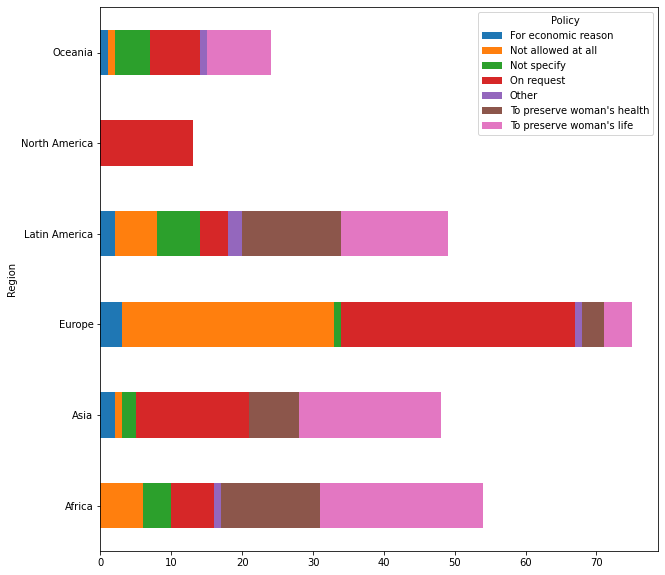

In [71]:
%matplotlib inline
# col_map = {'Law Varies By Jurisdiction': "steelblue", 'N/A': "lightgrey", 'Yes':'Green', 'No': 'Red'}
count_policy.plot.barh(stacked = True, figsize=(10,10))

In [76]:
(df_yn['Region'] == 'Europe') & (df_yn['Policy'] == 'Not allowed at all')

0      False
1      False
2      False
3      False
4      False
       ...  
258    False
259    False
260    False
261    False
262    False
Length: 263, dtype: bool

In [79]:
df_yn[(df_yn['Region'] == 'Europe') & (df_yn['Policy'] == 'Not allowed at all')].Country

103                          Andorra
119    Holy See / Vatican City State
128                            Malta
139                       San Marino
145                      Switzerland
146                           Aargau
147           Appenzell Ausserrhoden
148            Appenzell Innerrhoden
149                 Basel-Landschaft
150                      Basel-Stadt
151                             Bern
152                         Fribourg
153                           Genève
154                       Graubünden
155                             Jura
156                           Luzern
157                        Neuchâtel
158                        Nidwalden
159                         Obwalden
160                     Schaffhausen
161                           Schwyz
162                        Solothurn
163                        St Gallen
164                          Thurgau
165                           Ticino
166                              Uri
167                           Valais
1

### 3: Does it relate to religion?

In [ ]:
# Find the related dataset with religion

In [ ]:
# Merge

In [ ]:
https://www.worldreligiondatabase.org/

In [ ]:
https://data.world/cow/world-religion-data